In [38]:
# Reduce loading of auto fill for jupyter lab
%config Completer.use_jedi = False

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
from pandasql import sqldf

In [67]:
pysqldf = lambda q: sqldf(q, globals())

In [41]:
# Matplotlib settings

# Make matplotlib images appear inline in code
%matplotlib inline

# Global plot settings
d ={
    'axes.titlesize': 22,
    'axes.titleweight': 550,
    'axes.titlepad': 20,
    'axes.labelsize': 16,
    'axes.labelweight': 550,
    'axes.labelpad': 20,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
}

# Update settings with settings dictionary
plt.rcParams.update(d)

In [42]:
def figure_elements(x_size, y_size,
                    title=None, x_label=None,
                    y_label=None, grid_on=False
                   ):
    
    fig, ax = plt.subplots()
    
    # Set figure size
    fig.set_size_inches(x_size, y_size)
    
    # set a title and labels
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # Set a dashed grid background for plots
    if grid_on is True:
        ax.grid(color='gray', linestyle='dashed')
        ax.set_axisbelow(True)
    
    return(fig, ax)

In [43]:
# Data sets
covid_data = pd.read_csv('data/covid_data.csv', index_col=0)
chess_games = pd.read_csv('data/games.csv', index_col=0)

In [44]:
# Filter the covid_data data set by date, existance of continent field
# and ignore rows that have negative deaths recorded
q = '''
SELECT new_cases_per_million, new_deaths_per_million 
FROM covid_data 
WHERE date='2020-05-19' 
    AND new_deaths_per_million>0 
    AND new_cases_per_million>0;
    '''

covid_curr = pysqldf(q)

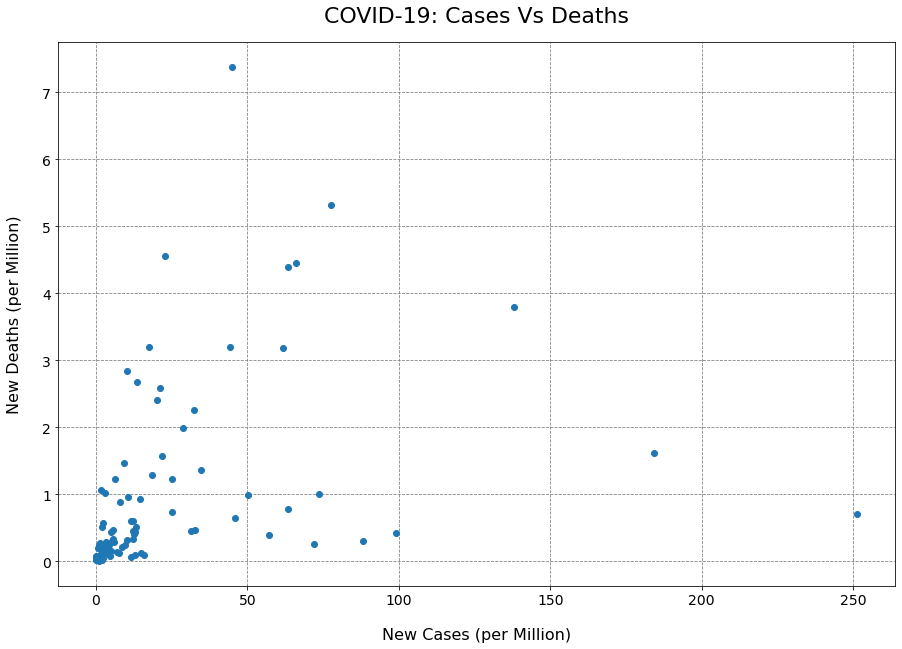

In [45]:
fig, ax = figure_elements(15, 10, 
                          'COVID-19: Cases Vs Deaths', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)',
                          grid_on=True
                         )

ax.scatter(covid_curr['new_cases_per_million'], covid_curr['new_deaths_per_million'])

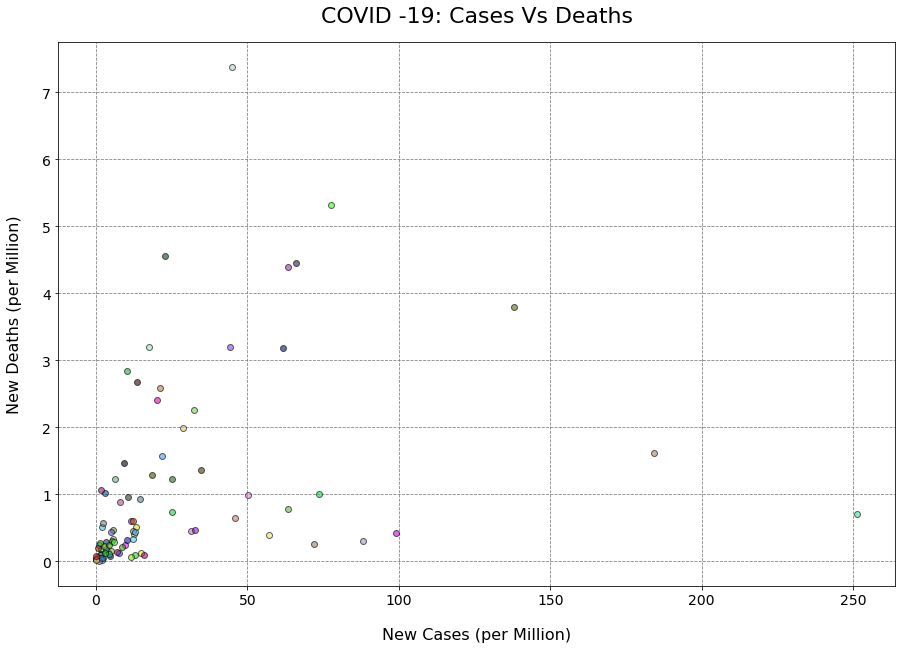

In [46]:
fig, ax = figure_elements(15, 10, 
                          'COVID -19: Cases Vs Deaths', 
                          'New Cases (per Million)', 
                          'New Deaths (per Million)',
                          grid_on=True
                         )

df_len = len(covid_curr)

# List of random, non-repeating, RGB colours
colour_list = np.random.rand(df_len,3).round(1)

# plot each data-point with a randomly generated RGB colour
for i in range(df_len):
    ax.scatter(covid_curr['new_cases_per_million'][i],
               covid_curr['new_deaths_per_million'][i],
               color=colour_list[i],
               alpha=0.6,
               edgecolors='black'
              )

In [47]:
# Only covid data for UK, drop no continent rows, and also any negative
# deaths
q = '''
SELECT date,
           new_cases_per_million,
           new_deaths_per_million,
           icu_patients_per_million,
           hosp_patients_per_million
FROM covid_data
WHERE location IS 'United Kingdom'
    AND continent IS NOT NULL
    AND new_deaths_per_million > 0;
'''
covid_to_date = pysqldf(q)

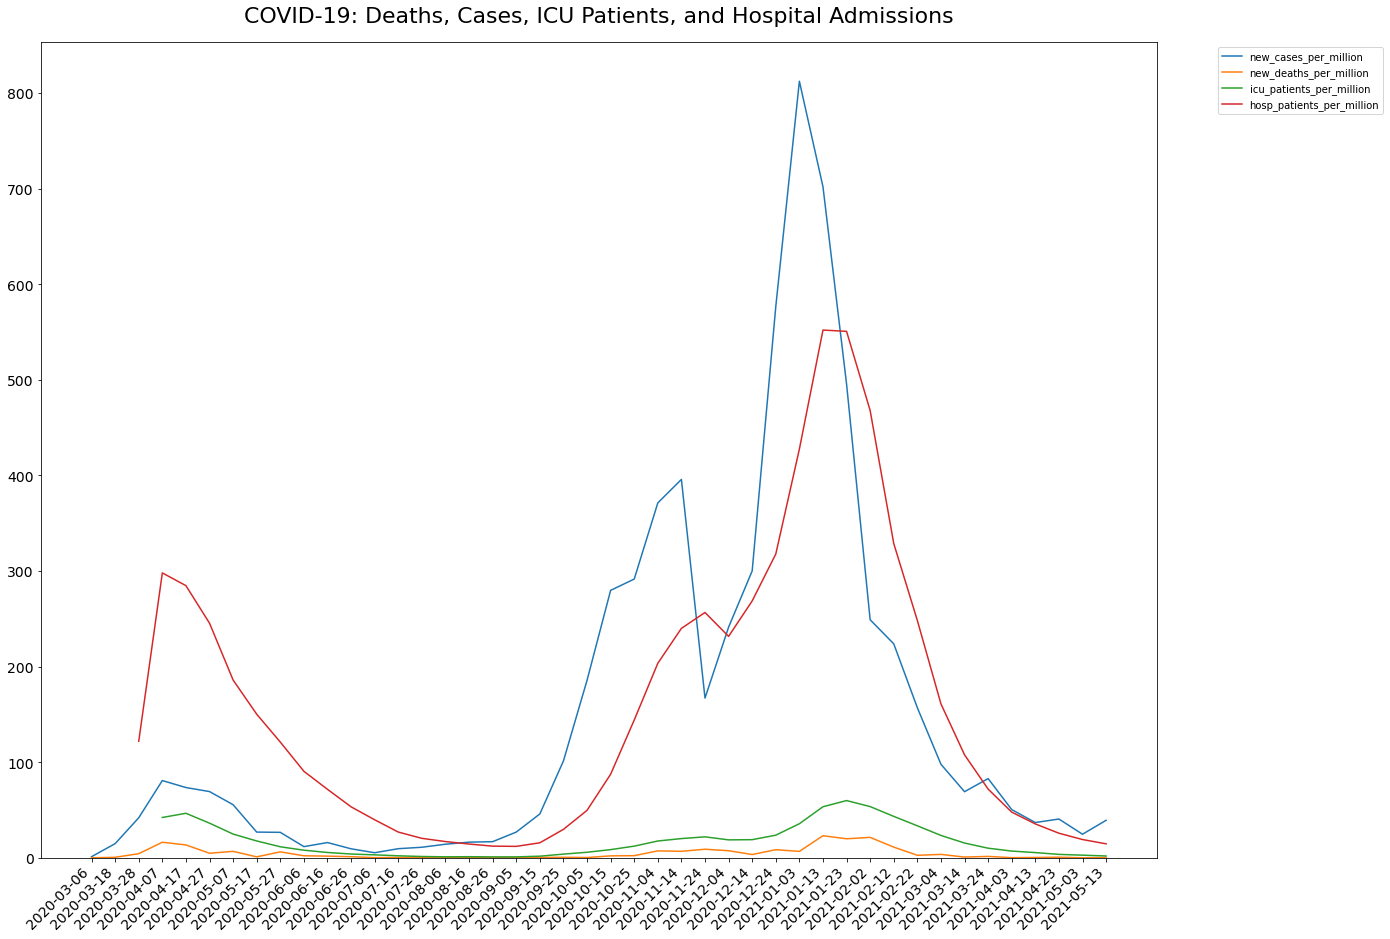

In [48]:
# columns to plot
columns = ['new_cases_per_million',
           'new_deaths_per_million',
           'icu_patients_per_million',
           'hosp_patients_per_million']

# create x data
x_data = covid_to_date['date'].values[0::10]

fig, ax = figure_elements(20, 15, 'COVID-19: Deaths, Cases, ICU Patients, and Hospital Admissions')

# plot each column
for column in columns:
    ax.plot(x_data, covid_to_date[column][0::10], label=column)

# ax.set_xlim((0, len(x_data)-1))
ax.set_ylim(bottom=0)

# set title and legend
plt.xticks(rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')

In [49]:
# Filter to get only high rated games
q = '''
SELECT *
FROM chess_games
WHERE black_rating >= 2000
    AND white_rating >= 2000
'''

high_rated = pysqldf(q)

(array([111., 382., 225.,  99.,  29.,   7.,   2.,   0.,   0.,   2.]),
 array([  2. ,  36.7,  71.4, 106.1, 140.8, 175.5, 210.2, 244.9, 279.6,
        314.3, 349. ]),
 <BarContainer object of 10 artists>)

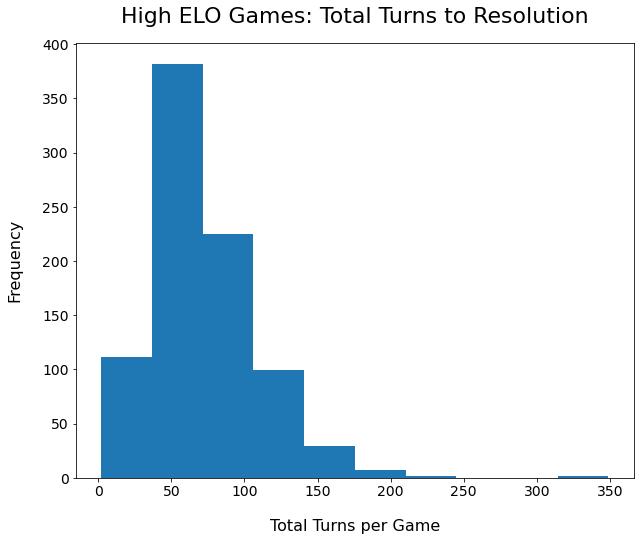

In [50]:
fig, ax = figure_elements(10, 8,
                         'High ELO Games: Total Turns to Resolution',
                         'Total Turns per Game',
                         'Frequency'
                         )

# plot histogram
ax.hist(high_rated['turns'])

In [51]:
# Most played openings in the highest rated games
openings = high_rated['opening_name'].value_counts()
top_openings = openings[openings > 4].sort_index()

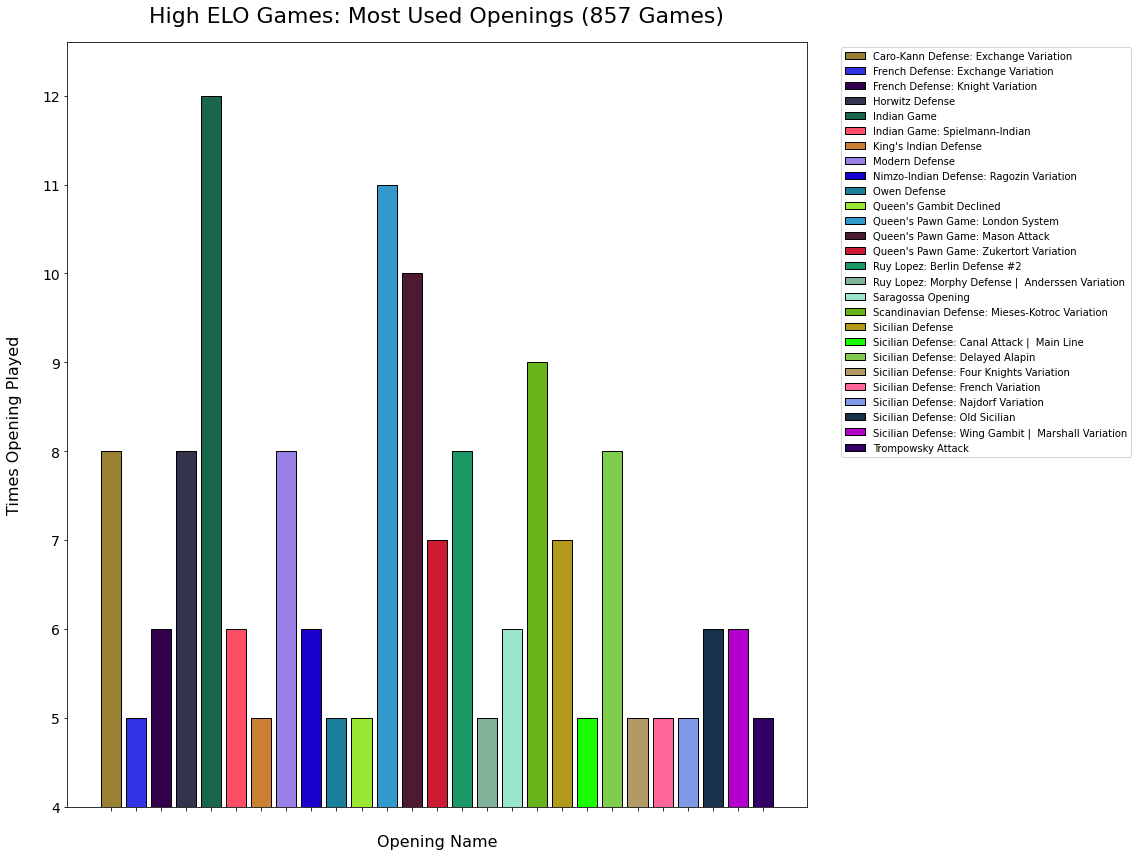

In [52]:
fig, ax = figure_elements(16, 12, 
                          f'High ELO Games: Most Used Openings ({len(high_rated)} Games)',
                          'Opening Name',
                          'Times Opening Played'
                         )

# get x and y data
points = top_openings.index
frequency = top_openings.values

# List of random, non-repeating, RGB colours
colour_list = np.random.rand(df_len,3).round(1)

for i in range(len(points)):
    ax.bar(points[i],
           frequency[i],
           color=colour_list[i],
           edgecolor='black'
          )
    
ax.set_xticklabels([])
ax.set_ylim(bottom=4)

# Move legend outside of the plot
plt.legend(points, bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
    
plt.show()

<AxesSubplot:title={'center':'High ELO: Rating Disparity'}, xlabel='black_rating', ylabel='white_rating'>

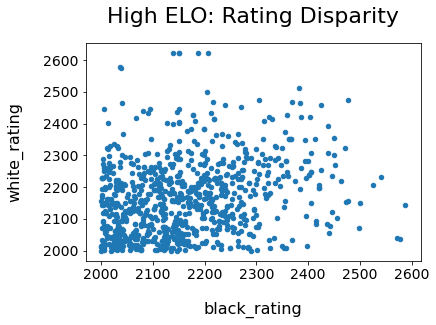

In [53]:
high_rated.plot.scatter(x='black_rating', y='white_rating', title='High ELO: Rating Disparity')

In [54]:
# Total deaths and cases.
q = '''
SELECT date, total_deaths_per_million, total_cases_per_million
FROM covid_data
WHERE location IS 'United Kingdom'
    AND continent IS NOT NULL
    AND total_deaths_per_million > 0 
'''

covid_totals = pysqldf(q)

<AxesSubplot:title={'center':'COVID-19: UK Deaths and Cases'}, xlabel='date'>

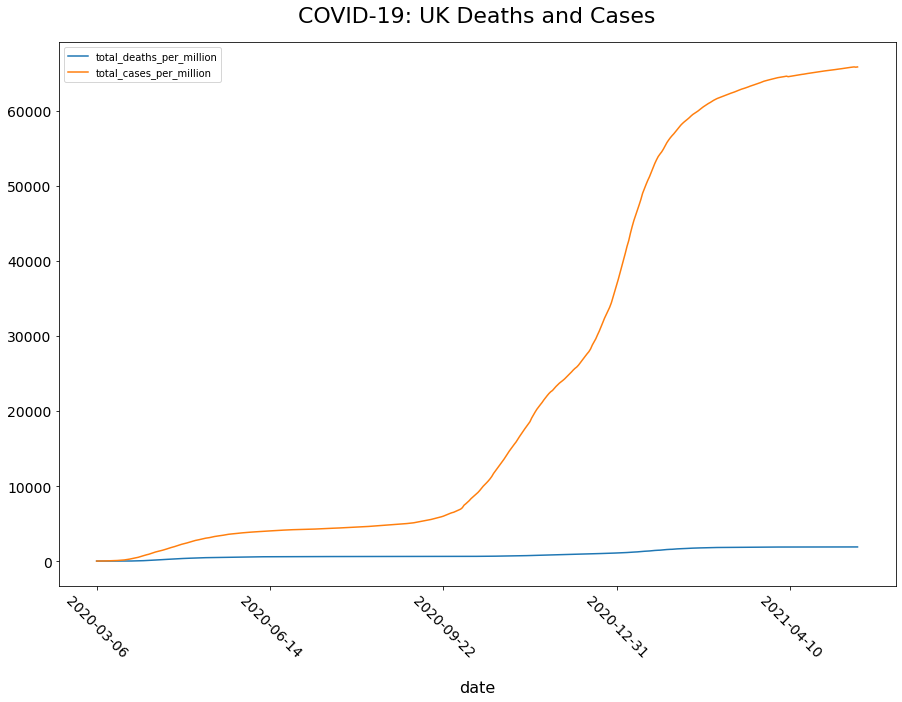

In [55]:
fig, ax = figure_elements(15, 10)
covid_totals.plot.line(ax=ax, x='date', title='COVID-19: UK Deaths and Cases', rot=-45)

<AxesSubplot:title={'center':'High ELO Games: Turns Per Game'}, ylabel='Frequency'>

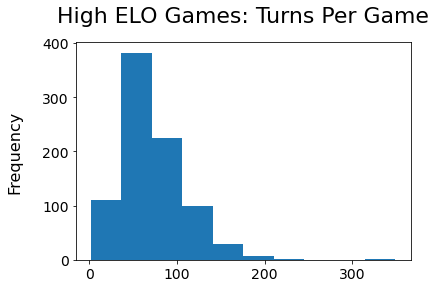

In [56]:
high_rated['turns'].plot.hist(title='High ELO Games: Turns Per Game')

In [57]:
q = '''
SELECT black_rating, white_rating
FROM high_rated
'''
rating_freq = pysqldf(q)

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>]], dtype=object)

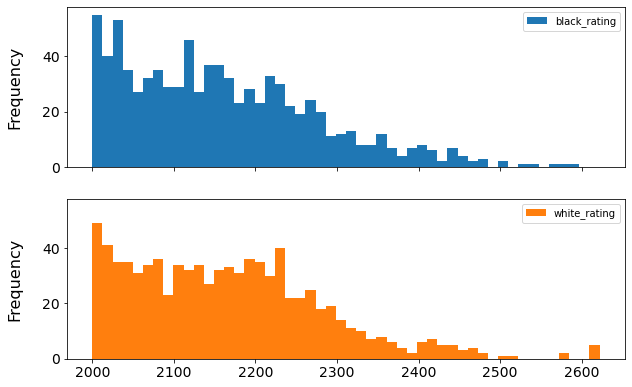

In [58]:
rating_freq.plot.hist(subplots=True, layout=(3,1), figsize=(10,10), bins=50, sharey=True)

(6.0, 12.6)

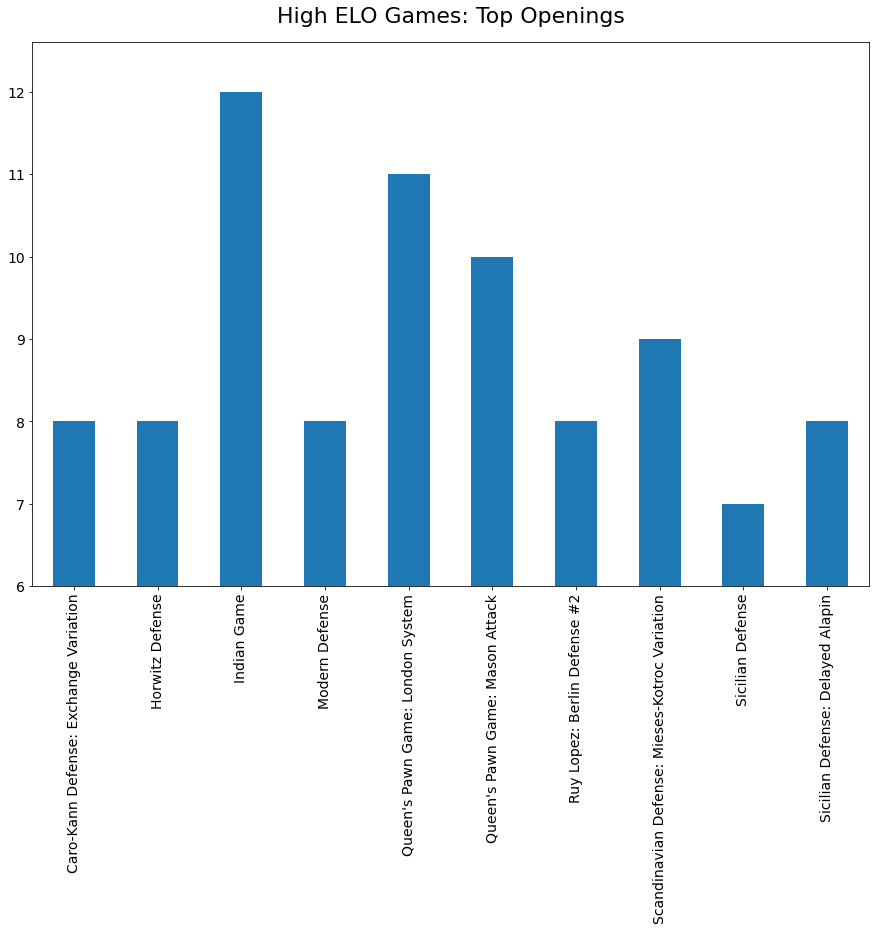

In [59]:
fig, ax = figure_elements(15,10)
high_rated['opening_name'].value_counts()[:10].sort_index().plot.bar(title='High ELO Games: Top Openings')
ax.set_ylim(6)

(6.0, 12.6)

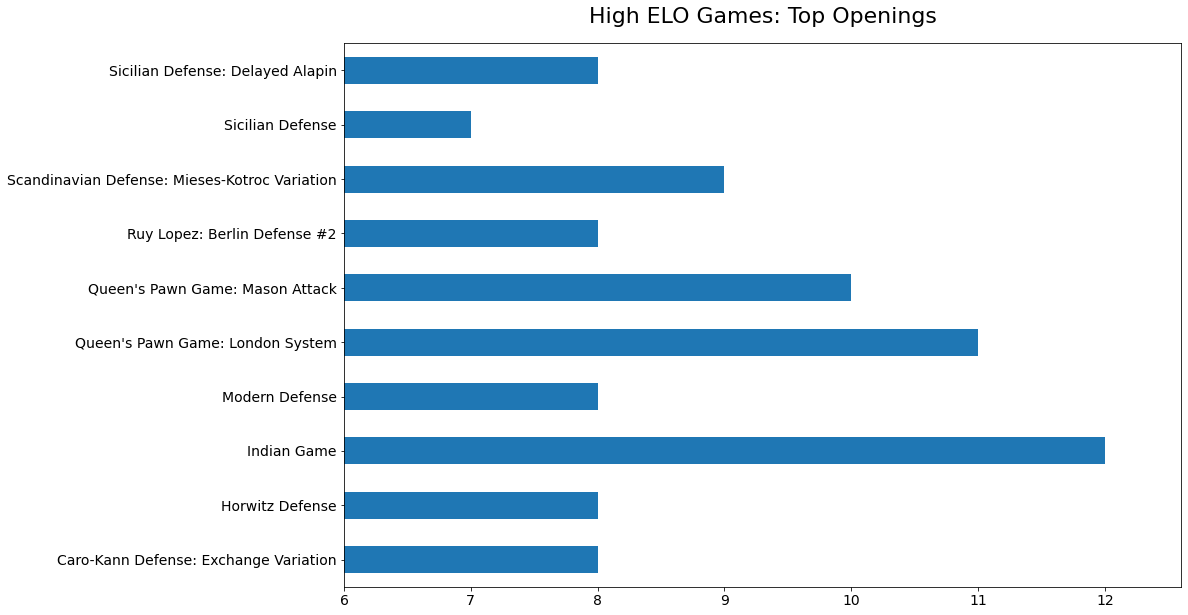

In [60]:
fig, ax = figure_elements(15,10)
high_rated['opening_name'].value_counts()[:10].sort_index().plot.barh(title='High ELO Games: Top Openings')
ax.set_xlim(6)

(140.0, 366.45)

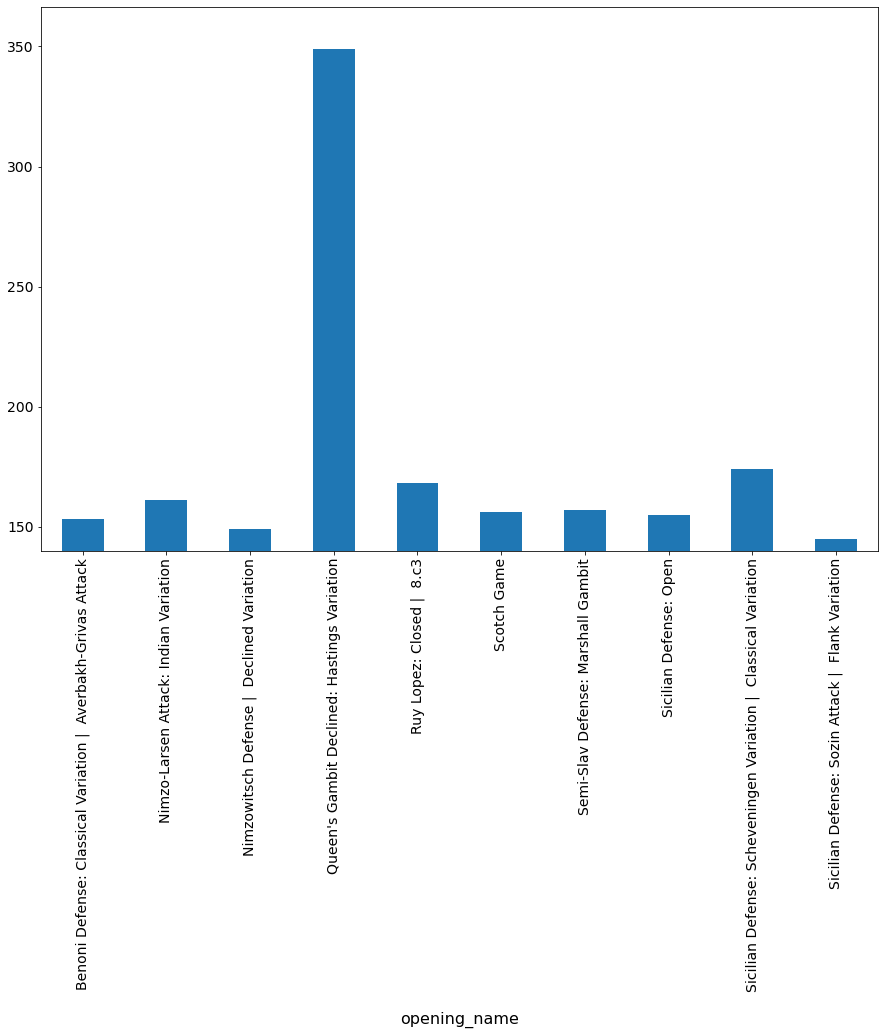

In [61]:
fig, ax = figure_elements(15,10)
high_rated.groupby('opening_name').turns.mean().sort_values(ascending=False)[:10].sort_index().plot.bar()
ax.set_ylim(140)

<AxesSubplot:xlabel='new_cases_per_million', ylabel='new_deaths_per_million'>

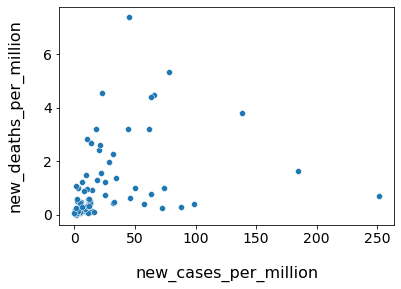

In [62]:
sns.scatterplot(x='new_cases_per_million', y='new_deaths_per_million', data=covid_curr)

In [63]:
# Filter new cases and deaths per million, plus continent to colour the plot points
q = '''
SELECT new_cases_per_million, new_deaths_per_million, continent 
FROM covid_data 
WHERE date='2020-05-19' 
    AND new_deaths_per_million>0 
    AND new_cases_per_million>0;
    '''

covid_curr = pysqldf(q)

<AxesSubplot:xlabel='new_cases_per_million', ylabel='new_deaths_per_million'>

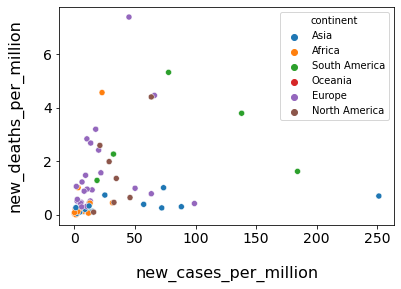

In [64]:
sns.scatterplot(x='new_cases_per_million', y='new_deaths_per_million', data=covid_curr, hue='continent')

In [69]:
covid_pivot = covid_to_date.pivot('date', ['new_deaths_per_million', 'new_cases_per_million'])

<ipython-input-73-cd098a9293d5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(covid_to_date['date'], rotation=-45, ha='left')


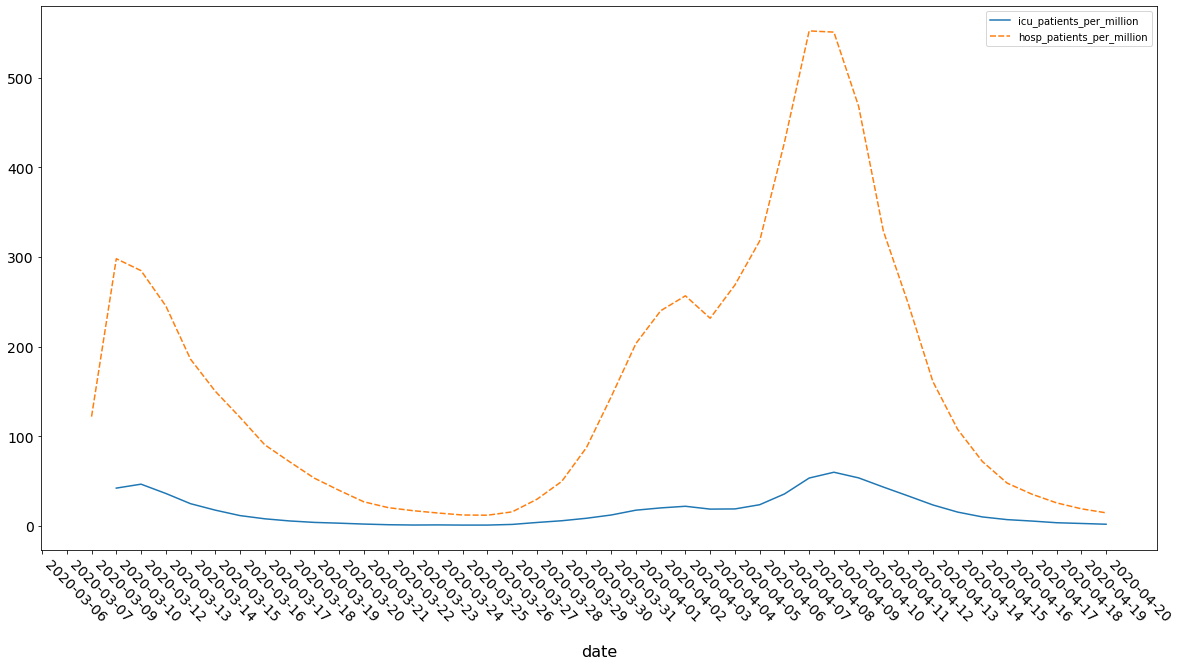

In [73]:
fig, ax = figure_elements(20,10)
sns.lineplot(ax=ax, data=covid_pivot[0::10])
ax.set_xticklabels(covid_to_date['date'], rotation=-45, ha='left')

plt.show()

<AxesSubplot:title={'center':'High ELO Games: Turns per Game'}, xlabel='turns', ylabel='Count'>

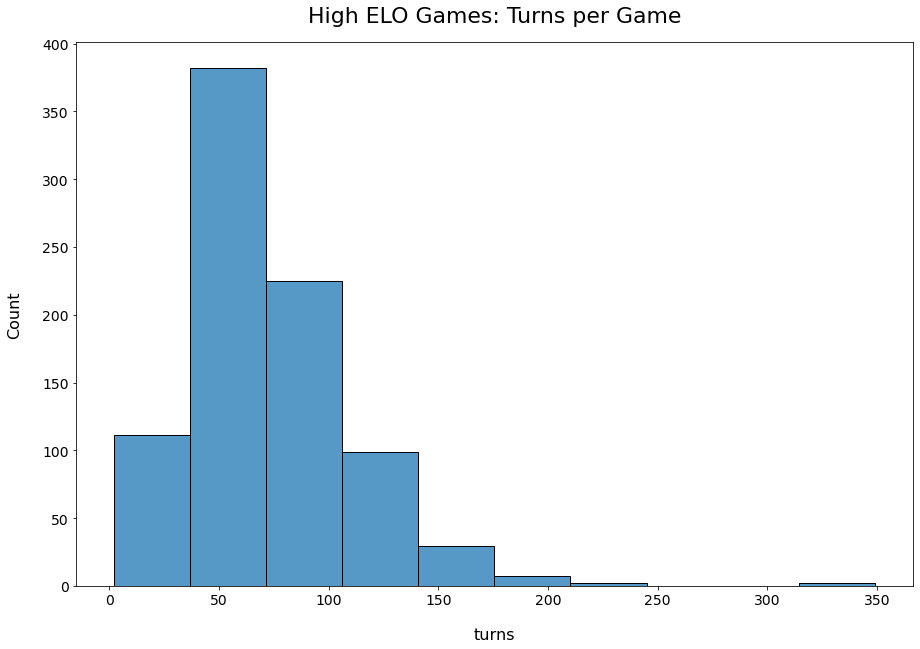

In [75]:
fig, ax = figure_elements(15,10, 'High ELO Games: Turns per Game')
sns.histplot(high_rated['turns'], bins=10, kde=False, ax=ax)

<AxesSubplot:title={'center':'High ELO Games: Turns per Game'}, xlabel='turns', ylabel='Count'>

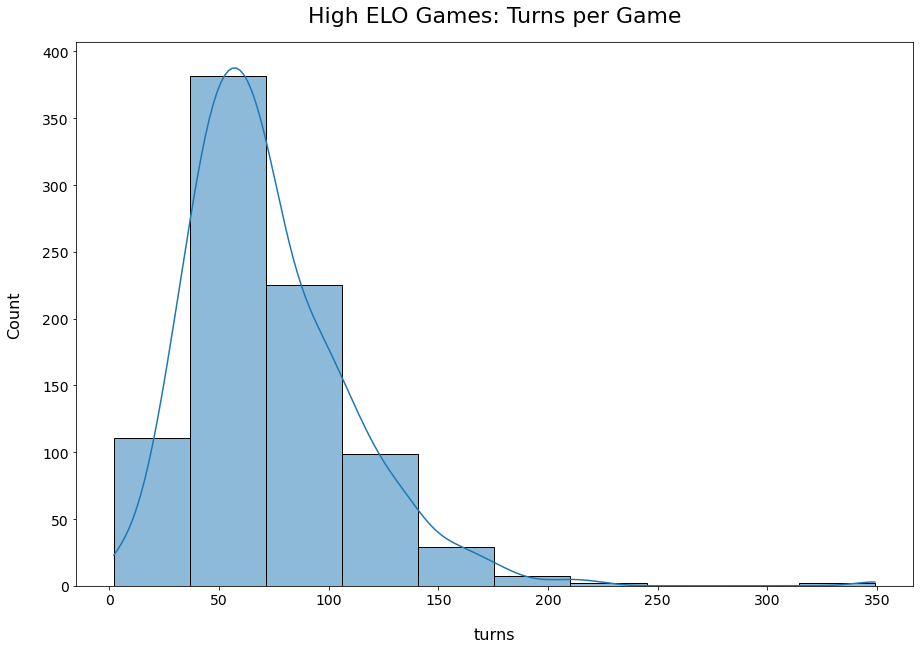

In [76]:
fig, ax = figure_elements(15,10,
                          'High ELO Games: Turns per Game'
                         )

sns.histplot(high_rated['turns'], bins=10, kde=True, ax=ax)

In [77]:
# Reduce opening variant names to most common root.
def opening_root(x):
    m = re.match(r'(.+?):|(.+?).\|', x)
    if m is not None:
        try:
            return m.group(1)
        except Exception as e:
            return m.group(2)

In [78]:
high_rated['re_openings'] = high_rated['opening_name'].apply(lambda x: opening_root(x))

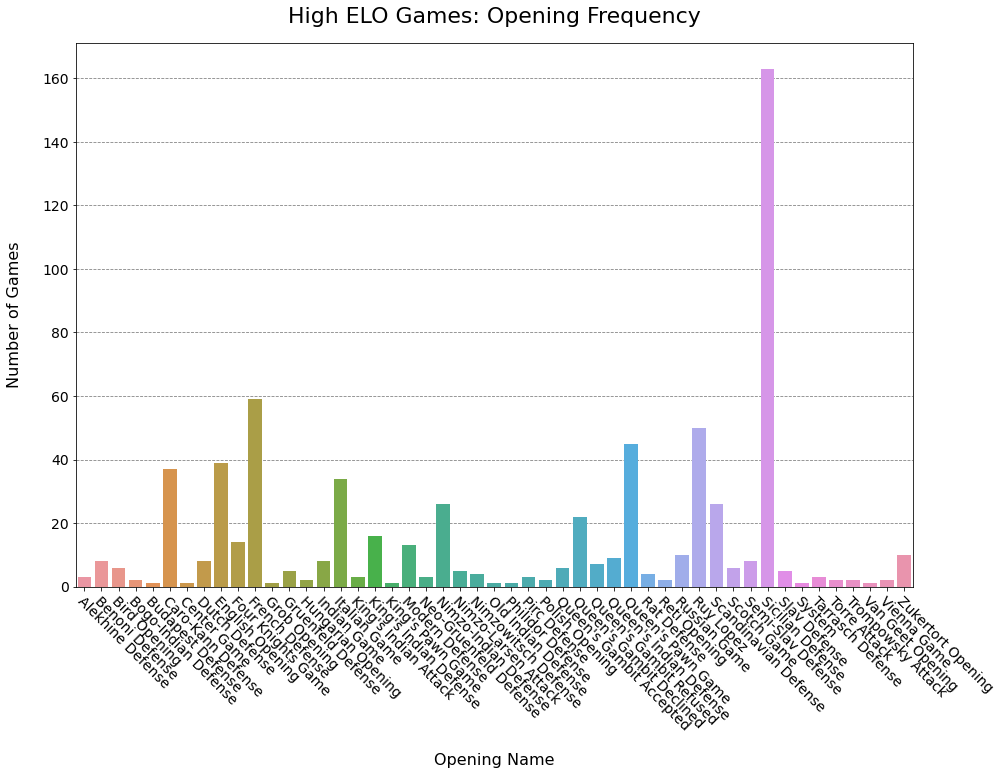

In [79]:
fig, ax = figure_elements(15,10,
                          'High ELO Games: Opening Frequency',
                          grid_on=True
                         )
sns.countplot(x=high_rated['re_openings'].sort_values(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left', rotation_mode='anchor')

ax.set_xlabel('Opening Name')
ax.set_ylabel('Number of Games')

plt.show()

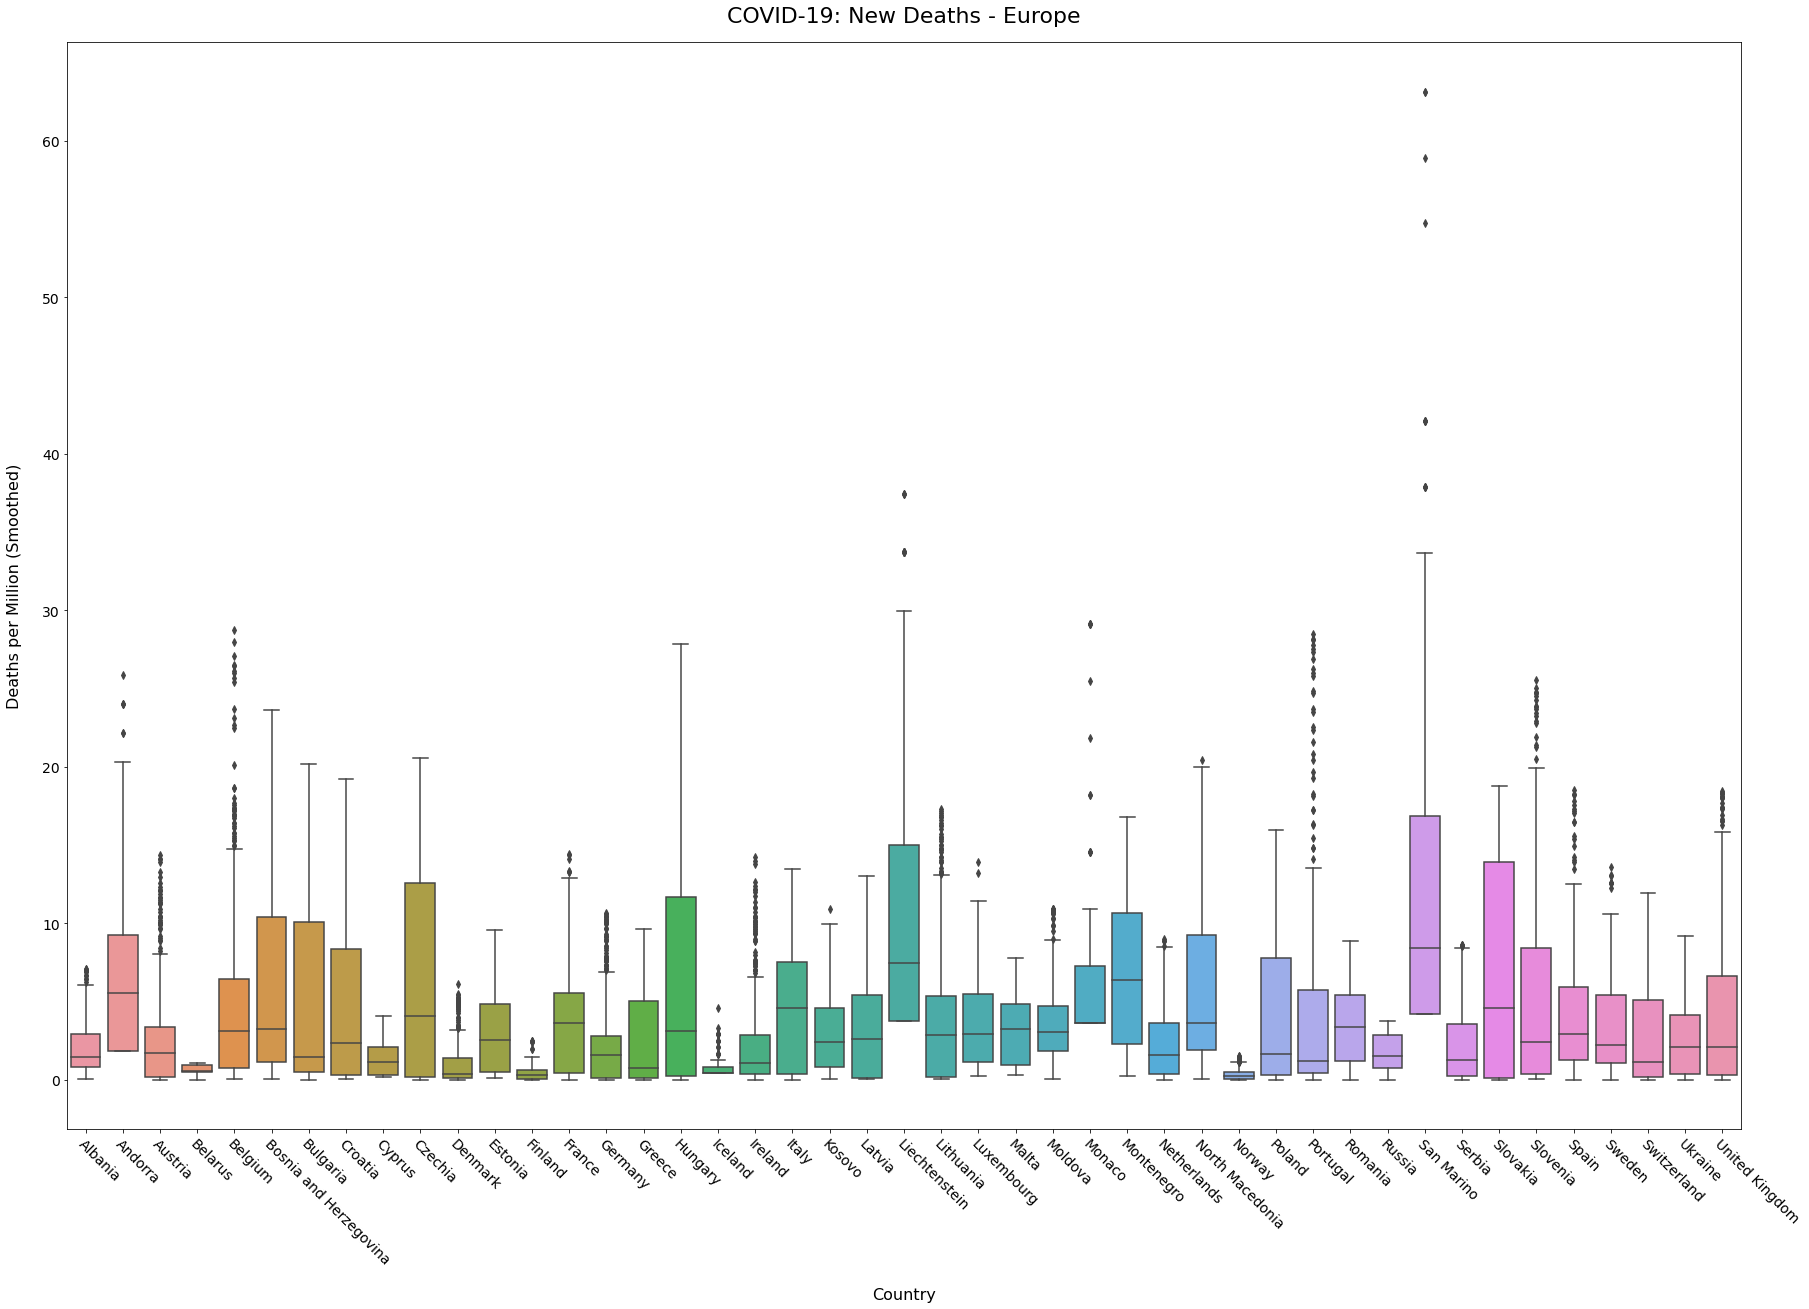

In [84]:
df = covid_data[(covid_data['continent'] == 'Europe') &
                (covid_data['new_deaths_smoothed_per_million'] > 0)
               ]

fig, ax = figure_elements(30, 20)

sns.boxplot(x='location', y='new_deaths_smoothed_per_million', data=df, ax=ax, )

ax.set_title('COVID-19: New Deaths - Europe')
ax.set_ylabel('Deaths per Million (Smoothed)')
ax.set_xlabel('Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, rotation_mode='anchor', ha='left')

plt.show()

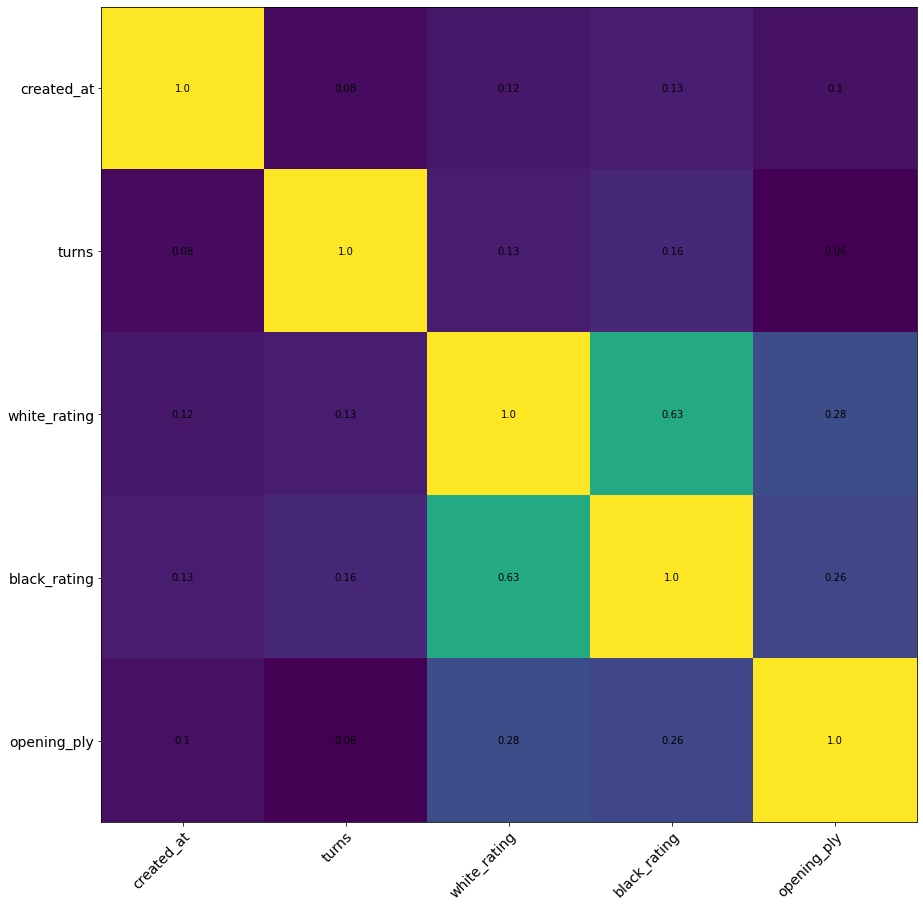

In [81]:
# get correlation matrix
corr = chess_games.drop(['rated', 'last_move_at'], axis=1).corr()
fig, ax = figure_elements(15,15)

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

<AxesSubplot:>

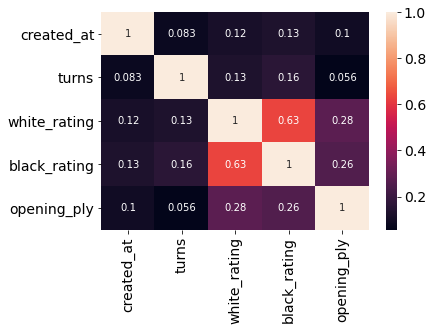

In [82]:
sns.heatmap(chess_games.drop(['rated', 'last_move_at'], axis=1).corr(), annot=True)

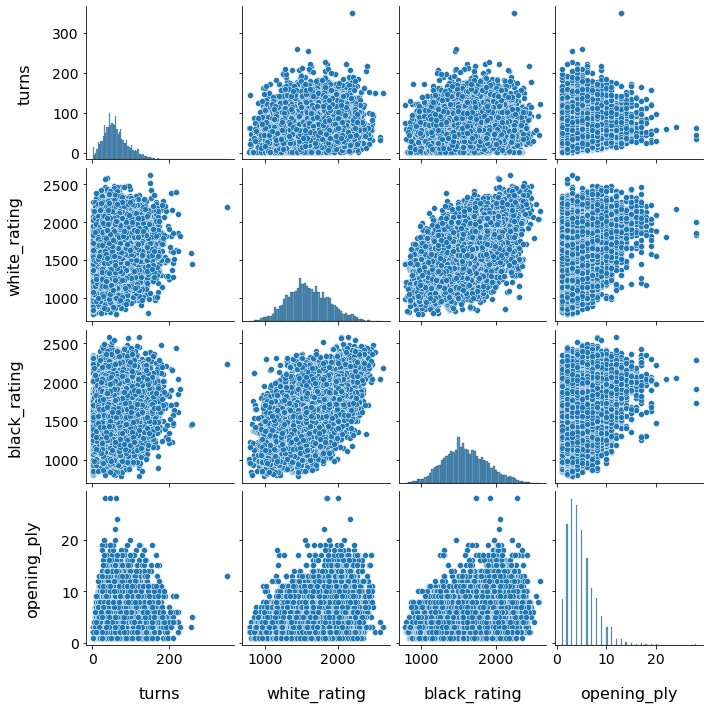

In [83]:
df = chess_games[chess_games['rated'] == True]
df.reset_index(inplace=True)
sns.pairplot(df.drop(['rated', 'last_move_at', 'id', 'created_at'], axis=1))